In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Measures
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import matplotlib
font = {'family' : 'Times New Roman',
        'size'   : 14}

matplotlib.rc('font', **font)

# Measures

In [2]:
#-------Class Balance--------
def average_class_balance(df, attribute):
    category_counts = df[attribute].value_counts()
    majority_class_count = category_counts.iloc[0]
    minority_counts = category_counts.iloc[1:]
    minority_count_average = np.mean(minority_counts)
    return minority_count_average/majority_class_count

In [3]:
def edit_class_balance(df, outcome, balance):
    data0 = (df.loc[df[outcome] == 0])
    data1 = (df.loc[df[outcome] == 1])
    r = len(data1)/len(data0)
    combined_data = None
    if balance < r:
        combined_data = pd.concat([data0, data1[ : round(len(data0)*balance)] ])
    else:
        combined_data = pd.concat([data0[ : round(len(data1)/balance)], data1 ])

    combined_data = combined_data.sample(frac=1)
    return combined_data

In [4]:
measures_steps = {
    'Class Balance': [0.2, 0.4, 0.6, 0.8, 1]
}
n_steps = len(list(measures_steps.values())[0])
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}
classifier_names = list(classifiers.keys())

metrics = {
    'Accuracy': np.zeros((len(classifiers), n_steps)),
    'Precision': np.zeros((len(classifiers), n_steps)),
    'Recall': np.zeros((len(classifiers), n_steps)),
    'F1 Score': np.zeros((len(classifiers), n_steps))
}

# Dataset

In [5]:
heart_attack = pd.read_csv('dataset/heart_attack.csv')
heart_attack = heart_attack.sample(frac=1, random_state=42).reset_index(drop=True)
y_class='output'
dataset_name = 'heart_attack'

train, test = train_test_split(heart_attack, test_size=0.3, random_state=42)
X_test = test.drop(y_class, axis=1)
y_test = test[y_class]

In [8]:
stroke = pd.read_csv('dataset/stroke.csv').sample(frac=1, random_state=42).reset_index(drop=True)
stroke.fillna(method='ffill',inplace=True)
y_class='stroke'
enc = LabelEncoder()
for i in stroke.columns:
    if stroke[i].dtype == "object":
        stroke[i]=enc.fit_transform(stroke[i])


dataset_name = 'stroke'

train, test = train_test_split(stroke, test_size=0.3, random_state=42)
X_test = test.drop(y_class, axis=1)
y_test = test[y_class]

In [11]:
marketing_campaign = pd.read_csv('dataset/marketing_campaign.csv',sep=';').sample(frac=1,random_state=42).reset_index(drop=True)
marketing_campaign = marketing_campaign.dropna()
marketing_campaign= marketing_campaign.reset_index(drop=True)
marketing_campaign.drop(['ID', 'Dt_Customer'], axis=1,inplace=True)
y_class='Response'
enc = LabelEncoder()
for i in marketing_campaign.columns:
    if marketing_campaign[i].dtype == "object":
        marketing_campaign[i]=enc.fit_transform(marketing_campaign[i])

dataset_name = 'marketing_campaign'

train, test = train_test_split(marketing_campaign, test_size=0.3, random_state=42)
X_test = test.drop([y_class], axis=1)
y_test = test[y_class]

data0 = (train.loc[train[y_class] == 0])
data1 = (train.loc[train[y_class] == 1])

In [14]:
heart_failure = pd.read_csv('dataset/heart_failure.csv')

y_class='HeartDisease'
enc = LabelEncoder()
for i in heart_failure.columns:
    if heart_failure[i].dtype == "object":
        heart_failure[i]=enc.fit_transform(heart_failure[i])


dataset_name = 'heart_failure'

train, test = train_test_split(heart_failure, test_size=0.3, random_state=42)
X_test = test.drop([y_class], axis=1)
y_test = test[y_class]

data0 = (train.loc[train[y_class] == 0])
data1 = (train.loc[train[y_class] == 1])

In [17]:
airline_passenger = pd.read_csv('dataset/airline_passenger.csv')
airline_passenger.dropna(inplace=True)
airline_passenger.drop(['Unnamed: 0','id'], axis=1,inplace=True)
airline_passenger = airline_passenger.reset_index(drop=True)
y_class='satisfaction'

airline_passenger[y_class] = airline_passenger[y_class].replace({'neutral or dissatisfied': 0, 'satisfied': 1})


enc = LabelEncoder()
for i in airline_passenger.columns:
    if airline_passenger[i].dtype == "object":
        airline_passenger[i]=enc.fit_transform(airline_passenger[i])


dataset_name = 'airline_passenger'

train, test = train_test_split(airline_passenger, test_size=0.3, random_state=42)
X_test = test.drop([y_class], axis=1)
y_test = test[y_class]

data0 = (train.loc[train[y_class] == 0])
data1 = (train.loc[train[y_class] == 1])

In [18]:
measure_value = []
for k, measure_steps in enumerate(measures_steps):

    for i, step in enumerate(measures_steps.get(measure_steps)):

        combined_data = edit_class_balance(train,y_class,step)

        X_train = combined_data.drop(y_class, axis=1)
        y_train = combined_data[y_class]
        '''
        X, y = make_classification(
                    n_samples=1000,
                    n_features=20,
                    n_informative=3,
                    n_redundant=0,
                    n_clusters_per_class=2,
                    weights=[step, 1-step],
                    random_state=42
                )
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

        dataset_name = 'synthetic'
        '''
        measure_value.append(average_class_balance(pd.DataFrame(y_train),y_class))
        for j, (classifier_name, classifier) in enumerate(classifiers.items()):
            # Standardize the features (optional but often recommended)
            scaler = StandardScaler()
            train_X_scaled = scaler.fit_transform(X_train)
            test_X_scaled = scaler.transform(X_test)

            # Train the classifier
            classifier.fit(train_X_scaled, y_train)
            # Make predictions on the fixed test set
            predictions = classifier.predict(test_X_scaled)
            # Calculate metrics and store in the metrics dictionary
            metrics['Accuracy'][j, i] = balanced_accuracy_score(y_test, predictions)
            metrics['Precision'][j, i] = precision_score(y_test, predictions, average='weighted')
            metrics['Recall'][j, i] = recall_score(y_test, predictions, average='weighted')
            metrics['F1 Score'][j, i] = f1_score(y_test, predictions, average='weighted')

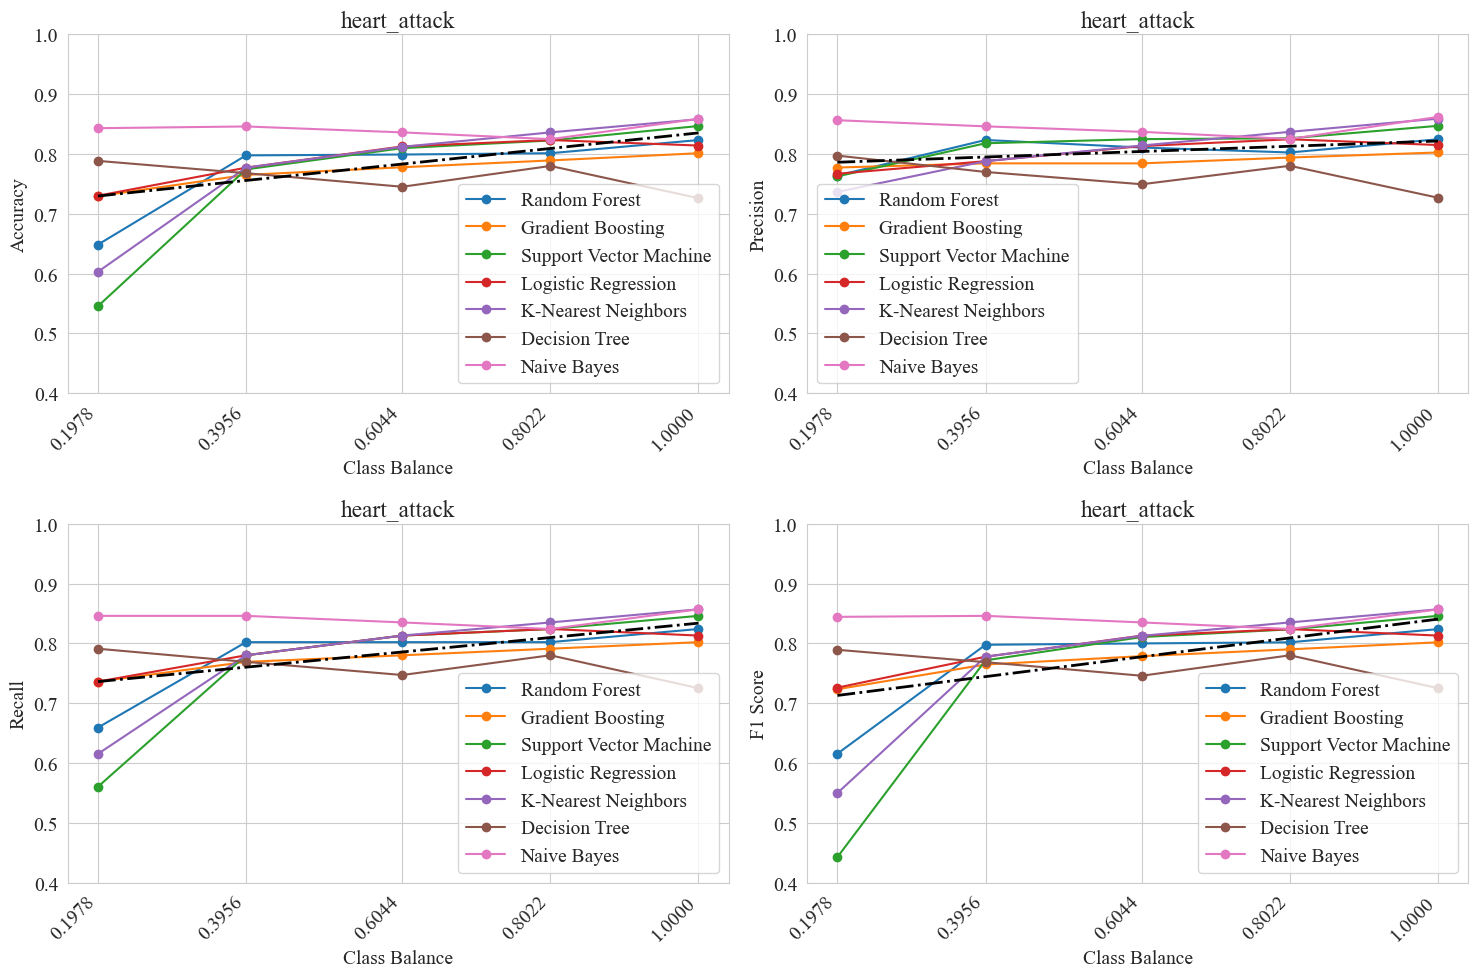

In [7]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value, metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xticks(rotation=45, ha='right')

        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(measure_value, np.mean(metric,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/class_balance_{dataset_name}.svg', format='svg')
plt.show()

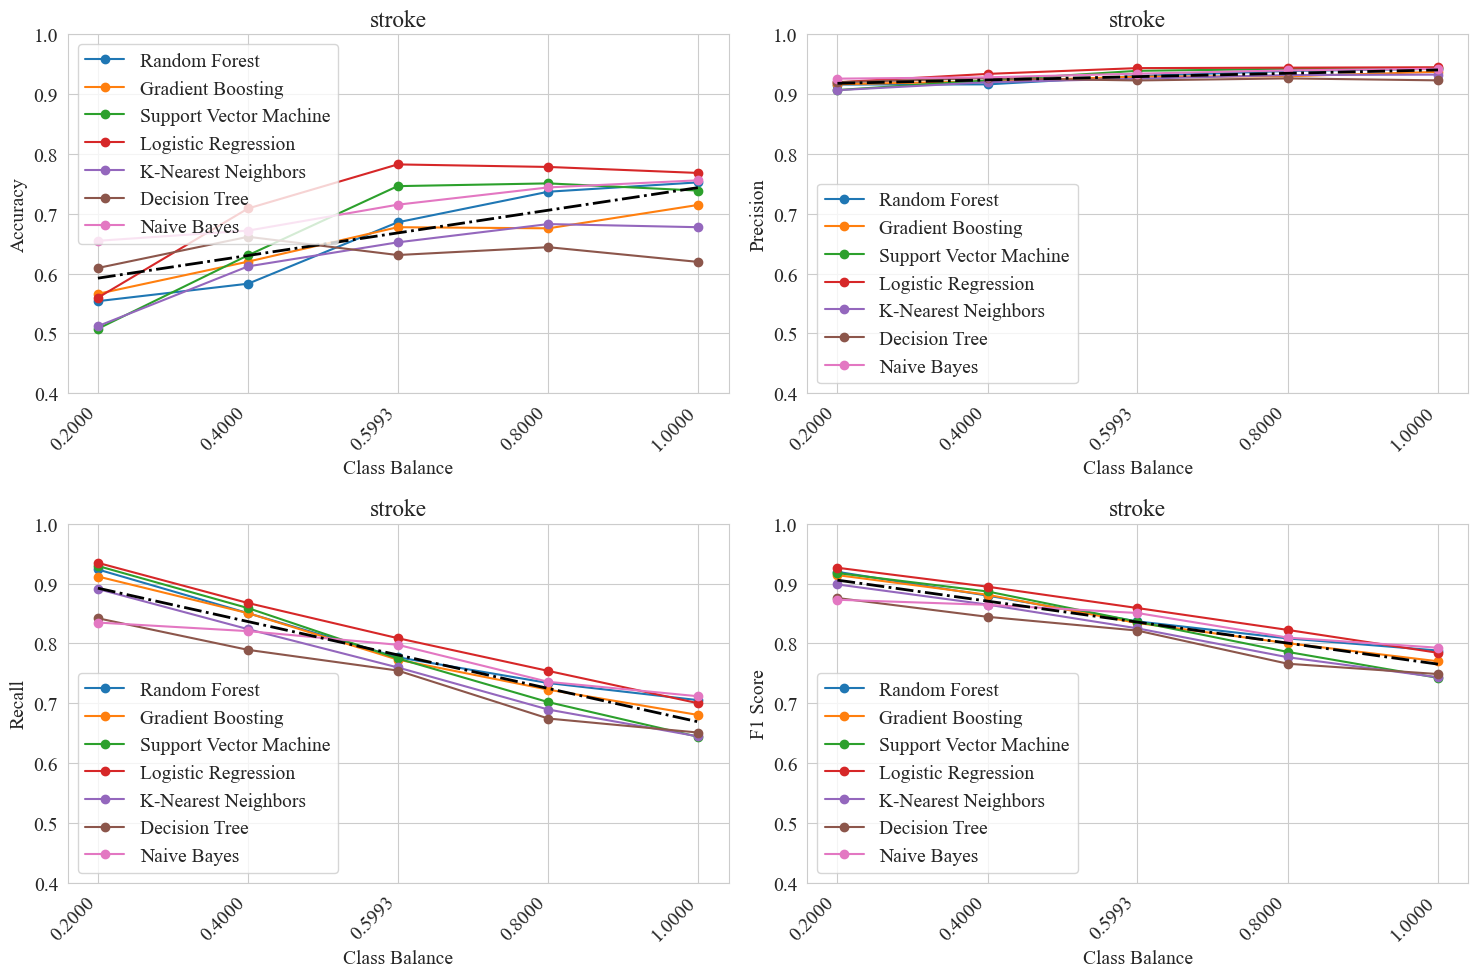

In [10]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value, metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xticks(rotation=45, ha='right')

        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(measure_value, np.mean(metric,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/class_balance_{dataset_name}.svg', format='svg')
plt.show()

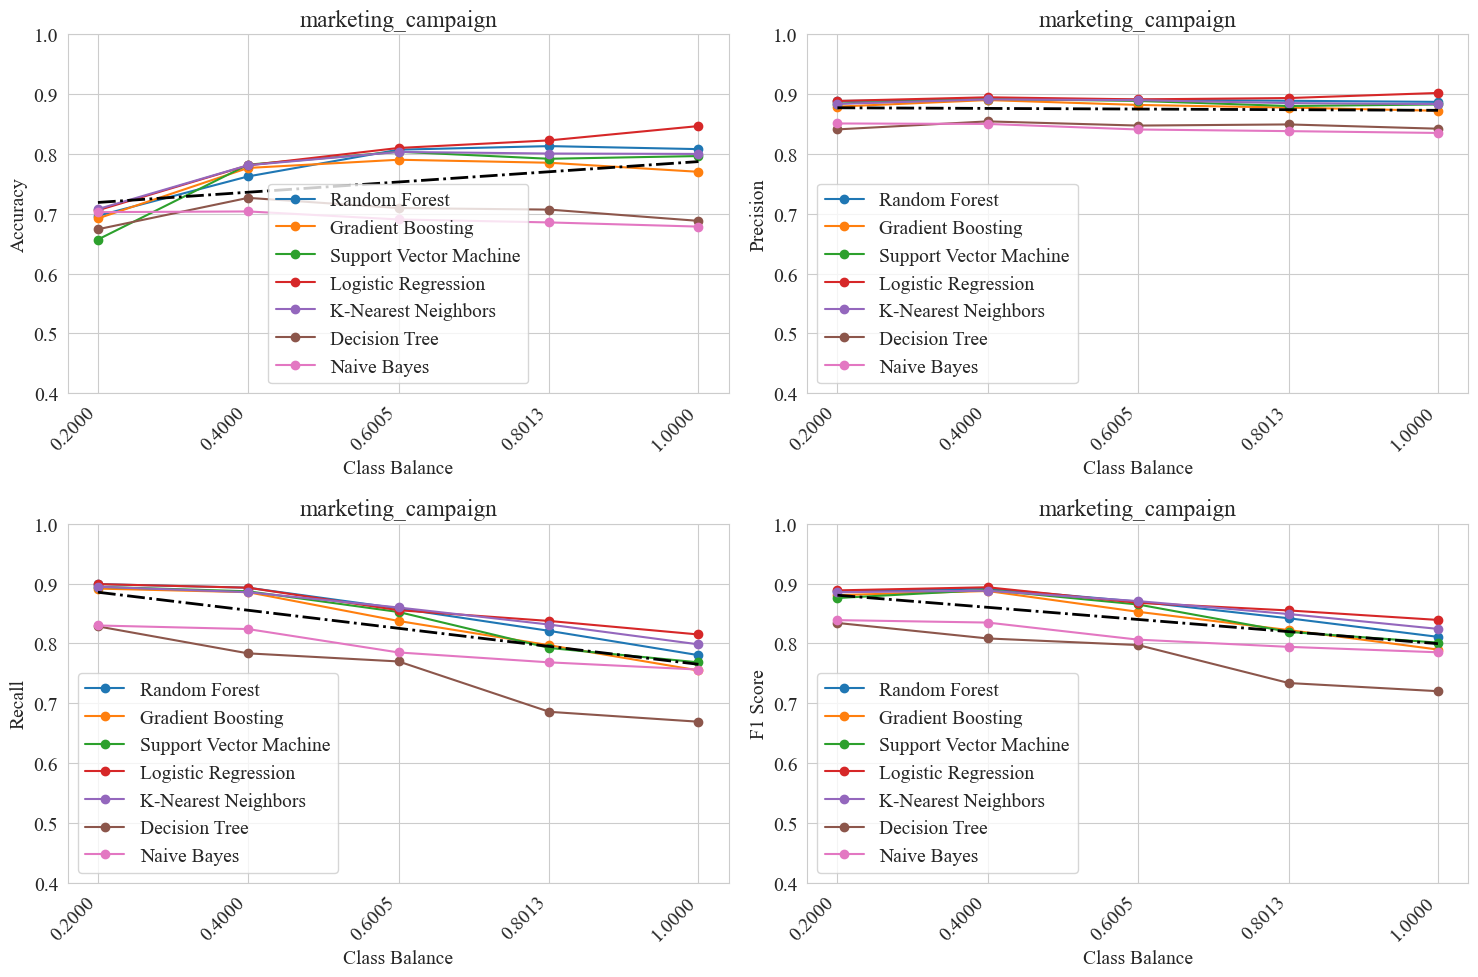

In [13]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value, metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xticks(rotation=45, ha='right')

        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(measure_value, np.mean(metric,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/class_balance_{dataset_name}.svg', format='svg')
plt.show()

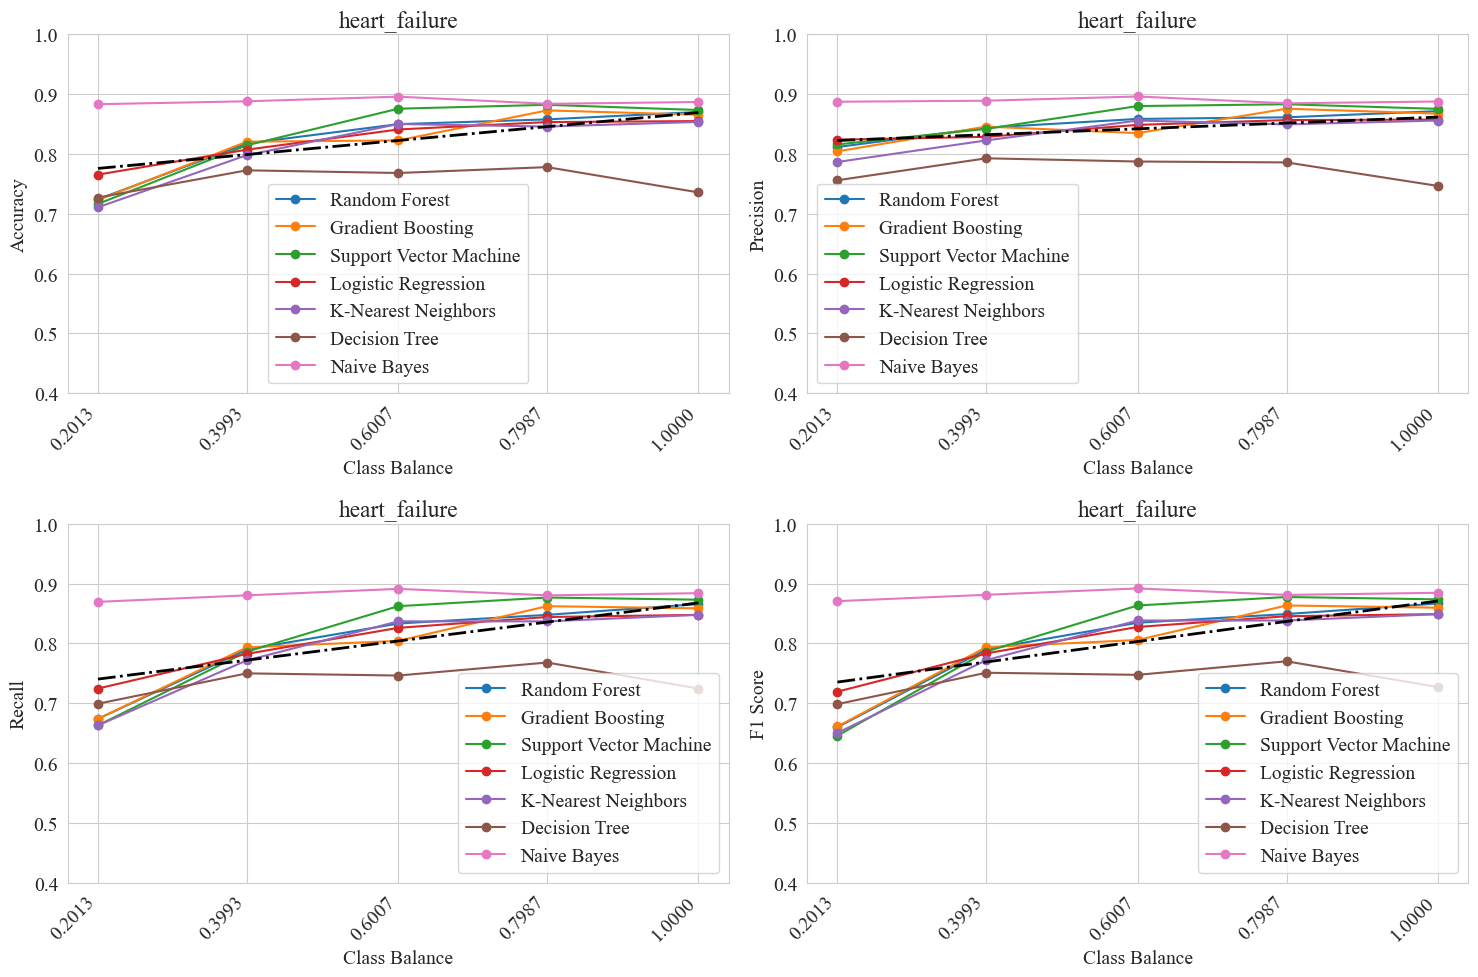

In [16]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value, metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xticks(rotation=45, ha='right')

        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(measure_value, np.mean(metric,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/class_balance_{dataset_name}.svg', format='svg')
plt.show()

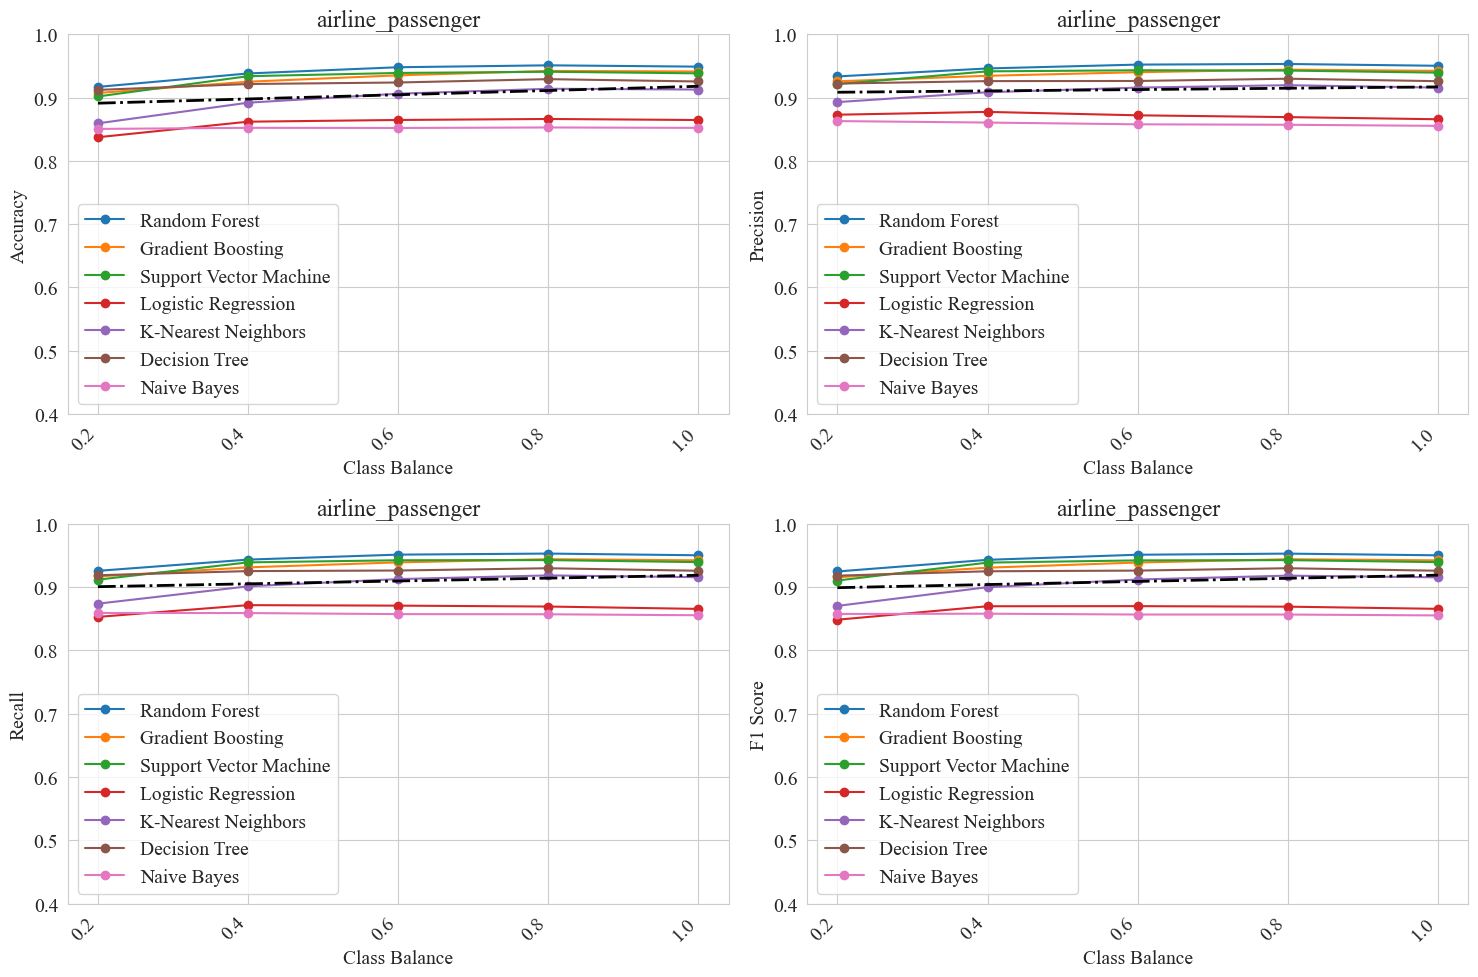

In [19]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value, metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xticks(rotation=45, ha='right')

        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(measure_value, np.mean(metric,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/class_balance_{dataset_name}.svg', format='svg')
plt.show()

In [23]:
dataset_name = 'synthetic_dataset'

measure_value = []
for k, measure_steps in enumerate(measures_steps):

    for i, step in enumerate(measures_steps.get(measure_steps)):

        X, y = make_classification(
                    n_samples=1000,
                    n_features=20,
                    n_informative=3,
                    n_redundant=0,
                    n_clusters_per_class=2,
                    weights=[step, 1-step],
                    random_state=42
                )
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

        measure_value.append(average_class_balance(pd.DataFrame(y_train),0))
        for j, (classifier_name, classifier) in enumerate(classifiers.items()):
            # Standardize the features (optional but often recommended)
            scaler = StandardScaler()
            train_X_scaled = scaler.fit_transform(X_train)
            test_X_scaled = scaler.transform(X_test)

            # Train the classifier
            classifier.fit(train_X_scaled, y_train)
            # Make predictions on the fixed test set
            predictions = classifier.predict(test_X_scaled)
            # Calculate metrics and store in the metrics dictionary
            metrics['Accuracy'][j, i] = balanced_accuracy_score(y_test, predictions)
            metrics['Precision'][j, i] = precision_score(y_test, predictions, average='weighted')
            metrics['Recall'][j, i] = recall_score(y_test, predictions, average='weighted')
            metrics['F1 Score'][j, i] = f1_score(y_test, predictions, average='weighted')

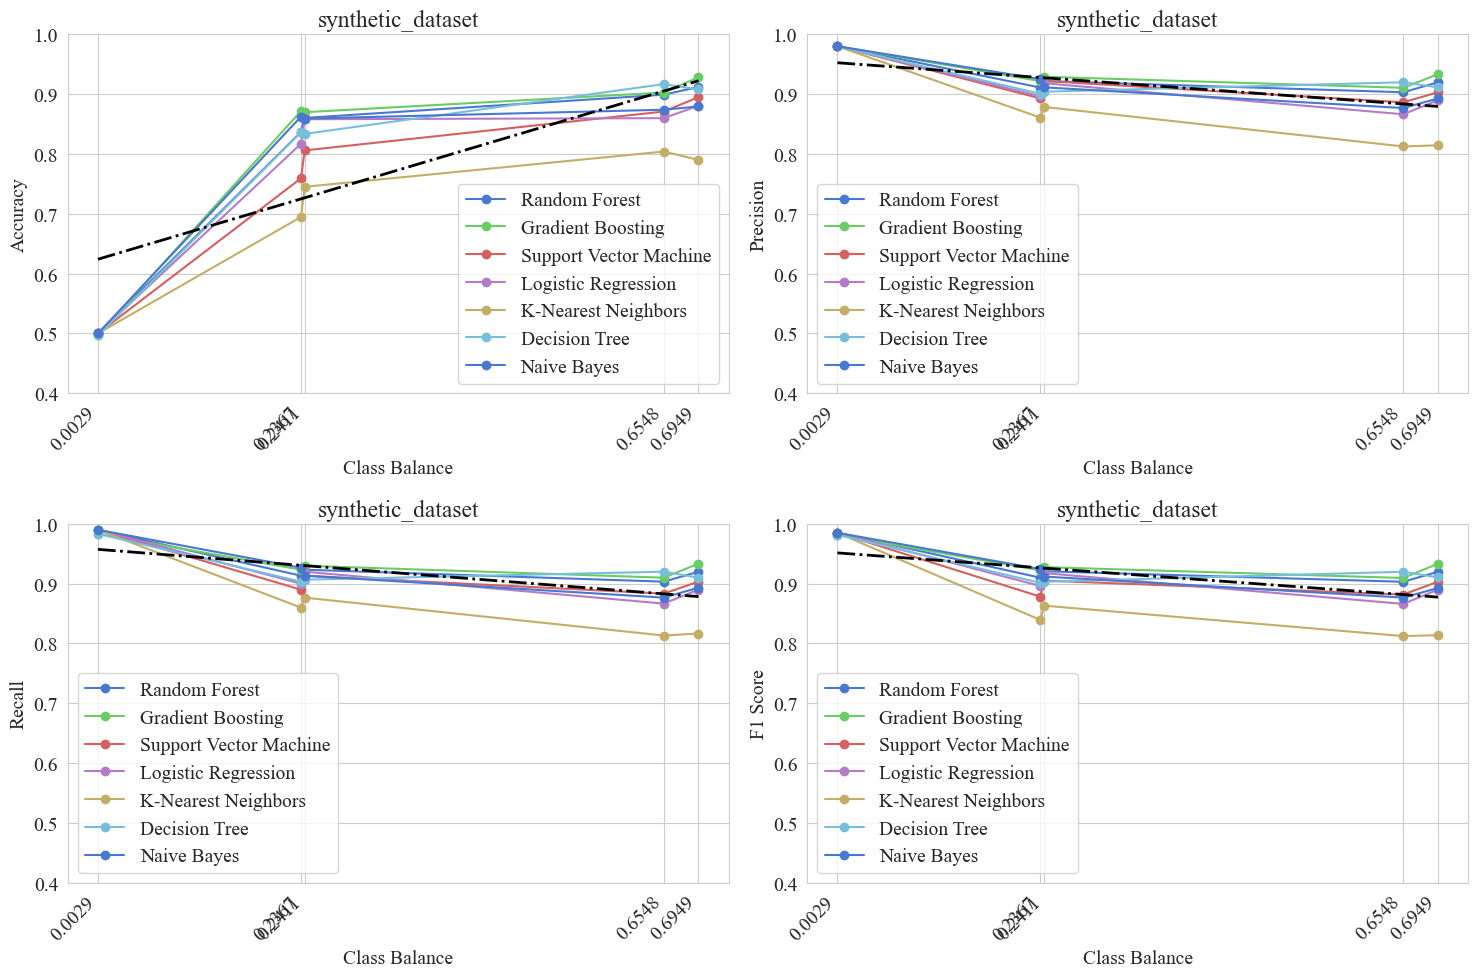

In [24]:
# Plotting
plt.figure(figsize=(15, 10))
for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_value, metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name}')
        plt.xticks(x)
        plt.xticks(rotation=45, ha='right')

        plt.xlabel(list(measures_steps)[0])
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(measure_value, np.mean(metric,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/class_balance_{dataset_name}.svg', format='svg')
plt.show()
